# Importing Libraries

In [1]:
import torch

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import colorsys
import random
import re
from tabulate import tabulate
from termcolor import cprint

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = '#7a7374'
XUEBAI = '#fffef9'
YINBAI = '#f1f0ed'
YINHUI = '#918072'

figure_size = (16, 9)

In [4]:
custom_params = {
    'axes.axisbelow': True,
    'axes.edgecolor': YINBAI,
    'axes.facecolor': XUEBAI,
    'axes.grid': True,
    'axes.labelcolor': XINHUI,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titlecolor': XINHUI,
    'figure.edgecolor': YINBAI,
    'figure.facecolor': XUEBAI,
    'grid.alpha': .8,
    'grid.color': YINBAI,
    'grid.linestyle': '--',
    'grid.linewidth': 1.2,
    'legend.edgecolor': YINHUI,
    'patch.edgecolor': XUEBAI,
    'patch.force_edgecolor': True,
    'text.color': XINHUI,
    'xtick.color': YINHUI,
    'ytick.color': YINHUI,
}

mpl.rcParams.update(custom_params)

# Pre-installing Required Functions

In [5]:
def list_head_checker(list_1, list_2):
    for i in range(len(list_2)):
        if list_1[-1] == list_2[0]:
            head, list_2 = list_2[0], list_2[1:]
            list_2.append(head)
        else:
            break
    return list_2

In [6]:
def list_connector(list_1, list_2):
    if list_1 != []:
        list_2 = list_head_checker(list_1, list_2)
    list_1 += list_2
    return list_1

In [7]:
def color_list_generator(n=100):
    termcolors = [
        'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
    ]
    global font_colors_list
    font_colors_list = []
    for i in range(((n - 1) // 8 + 1)):
        if n <= 8:
            random_list = random.sample(termcolors, k=n)
            list_connector(font_colors_list, random_list)
        else:
            if i < ((n - 1) // 8):
                random_list = random.sample(termcolors, k=8)
                list_connector(font_colors_list, random_list)
            else:
                k = n % 8
                if k == 0:
                    random_list = random.sample(termcolors, k=8)
                    list_connector(font_colors_list, random_list)
                elif k == 1:
                    random_list = random.sample(termcolors, k=2)
                    font_colors_list = list_connector(font_colors_list,
                                                      random_list)[:-1]
                else:
                    random_list = random.sample(termcolors, k=k)
                    list_connector(font_colors_list, random_list)

In [8]:
def font_color_printer(string, *args, **kwargs):
    global adjusted_width, font_colors_list, previous_color
    try:
        font_colors_list
    except NameError:
        color_list_generator()
    if font_colors_list == []:
        color_list_generator()
    previous_color = font_colors_list.pop(0)
    adjusted_width = 59
    return cprint(string, previous_color, attrs=['underline'], end='\n\n')

In [9]:
def statement_generator(statements):
    global adjusted_width, previous_color
    table = [["Statement"]]
    for statement in statements:
        if len(statement) > adjusted_width:
            printable_statement = ""
            printable_line = statement
            while len(statement) > adjusted_width:
                while printable_line.rfind(' ') > adjusted_width:
                    printable_line = printable_line[:printable_line.rfind(' ')]
                else:
                    printable_line = printable_line[:printable_line.rfind(' ')]
                printable_statement += printable_line + "\n"
                statement = statement[len(printable_line) + 1:]
                printable_line = statement
            else:
                printable_statement += printable_line
                table.append([printable_statement])
        else:
            table.append([statement])
    table_list = tabulate(table,
                          headers='firstrow',
                          tablefmt='pretty',
                          colalign=('left', )).split('\n')
    for line in table_list:
        cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

In [10]:
def variable_generator(variables, values):
    global adjusted_width, previous_color
    table = [["Variable", "Value"]]
    max_length = len(max(variables, key=len))
    if len("Variable") >= max_length:
        length_variable = len("Variable")
    else:
        length_variable = max_length
    remainder = adjusted_width - length_variable - 3
    for variable, value in zip(variables, values):
        if len(value) > remainder:
            if re.search(r'\n', str(value)):
                start = 0
                printable_value = ""
                string_list = []
                for match in re.finditer(r'\n', str(value)):
                    nested_string = str(value)[start:match.span()[0]]
                    string_list.append(nested_string)
                    start = match.span()[1]
                string_list.append(str(value)[start:])
                for nested_string in string_list:
                    if len(nested_string) > remainder:
                        printable_string = ""
                        printable_line = nested_string
                        while len(nested_string) > remainder:
                            while printable_line.rfind(' ') > remainder:
                                printable_line = printable_line[:printable_line
                                                                .rfind(' ')]
                            else:
                                printable_line = printable_line[:printable_line
                                                                .rfind(' ')]
                            printable_string += printable_line + "\n"
                            nested_string = nested_string[len(printable_line) +
                                                          1:]
                            printable_line = nested_string
                        else:
                            printable_string += printable_line
                            printable_value += printable_string + "\n"
                    else:
                        printable_value += nested_string + "\n"
                table.append([variable, printable_value.strip("\n")])
            else:
                printable_value = ""
                printable_line = value
                while len(value) > remainder:
                    while printable_line.rfind(' ') > remainder:
                        printable_line = printable_line[:printable_line.
                                                        rfind(' ')]
                    else:
                        printable_line = printable_line[:printable_line.
                                                        rfind(' ')]
                    printable_value += printable_line + "\n"
                    value = value[len(printable_line) + 1:]
                    printable_line = value
                else:
                    printable_value += printable_line
                    table.append([variable, printable_value])
        else:
            table.append([variable, value])
    table_list = tabulate(table,
                          headers='firstrow',
                          tablefmt='pretty',
                          colalign=("left", "left")).split('\n')
    for line in table_list:
        cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

In [11]:
def expression_generator(expressions, results):
    global adjusted_width, previous_color
    table = [["Expression", "Result"]]
    max_length = len(max(expressions, key=len))
    if len("Expression") >= max_length:
        length_expression = len("Expression")
    else:
        length_expression = max_length
    remainder = adjusted_width - length_expression - 3
    for expression, result in zip(expressions, results):
        if len(result) > remainder:
            if re.search(r'\n', str(result)):
                start = 0
                printable_result = ""
                string_list = []
                for match in re.finditer(r'\n', str(result)):
                    nested_string = str(result)[start:match.span()[0]]
                    string_list.append(nested_string)
                    start = match.span()[1]
                string_list.append(str(result)[start:])
                for nested_string in string_list:
                    if len(nested_string) > remainder:
                        printable_string = ""
                        printable_line = nested_string
                        while len(nested_string) > remainder:
                            while printable_line.rfind(' ') > remainder:
                                printable_line = printable_line[:printable_line
                                                                .rfind(' ')]
                            else:
                                printable_line = printable_line[:printable_line
                                                                .rfind(' ')]
                            printable_string += printable_line + "\n"
                            nested_string = nested_string[len(printable_line) +
                                                          1:]
                            printable_line = nested_string
                        else:
                            printable_string += printable_line
                            printable_result += printable_string + "\n"
                    else:
                        printable_result += nested_string + "\n"
                table.append([expression, printable_result.strip("\n")])
            else:
                printable_result = ""
                printable_line = result
                while len(result) > remainder:
                    while printable_line.rfind(' ') > remainder:
                        printable_line = printable_line[:printable_line.
                                                        rfind(' ')]
                    else:
                        printable_line = printable_line[:printable_line.
                                                        rfind(' ')]
                    printable_result += printable_line + "\n"
                    result = result[len(printable_line) + 1:]
                    printable_line = result
                else:
                    printable_result += printable_line
                    table.append([expression, printable_result])
        else:
            table.append([expression, result])
    table_list = tabulate(table,
                          headers='firstrow',
                          tablefmt='pretty',
                          colalign=("left", "left")).split('\n')
    for line in table_list:
        cprint('\t'.expandtabs(4) + line, previous_color, attrs=['bold'])

In [12]:
def calm_color_generator(n):
    colors = []
    hue = np.repeat(np.random.random(), n)
    hue_interval = np.linspace(0, 1, n, endpoint=False)
    saturation = 0.6 + np.random.random() / 5.0 * np.random.choice([-1, 1])
    lightness = 0.5 + np.random.random() / 10.0 * np.random.choice([-1, 1])
    h = hue + hue_interval
    h = np.where(h > 1, h - 1, h)
    s = np.repeat(saturation, n)
    l = np.repeat(lightness, n)
    array_hls = np.concatenate((h, l, s)).reshape(-1, n).T
    for hls in array_hls:
        r, g, b = [
            int(256 * e) for e in colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
        ]
        colors.append('#%02X%02X%02X' % (r, g, b))
    return colors

# Practicing in Stages

## 1 Dimensional Tensors

In [13]:
v = torch.tensor([1, 2, 3, 4, 5, 6])

font_color_printer("Default one-dimensional tensor")

statement_1 = ["v = torch.tensor([1, 2, 3, 4, 5, 6])"]
statements = statement_1
statement_generator(statements)

variables = ["v"]
values = [str(v)]
variable_generator(variables, values)

Default one-dimensional tensor

    +--------------------------------------+
    | Statement                            |
    +--------------------------------------+
    | v = torch.tensor([1, 2, 3, 4, 5, 6]) |
    +--------------------------------------+
    +----------+----------------------------+
    | Variable | Value                      |
    +----------+----------------------------+
    | v        | tensor([1, 2, 3, 4, 5, 6]) |
    +----------+----------------------------+


In [14]:
font_color_printer("Basic information of default 1D tensor")

expressions = ["v.dtype", "v.type()", "type(v)", "v.size()"]
results = [str(v.dtype), str(v.type()), str(type(v)), str(v.size())]
expression_generator(expressions, results)

Basic information of default 1D tensor

    +------------+------------------------+
    | Expression | Result                 |
    +------------+------------------------+
    | v.dtype    | torch.int64            |
    | v.type()   | torch.LongTensor       |
    | type(v)    | <class 'torch.Tensor'> |
    | v.size()   | torch.Size([6])        |
    +------------+------------------------+


In [15]:
font_color_printer("Element selection of 1D tensor")

expressions = ["v[0]", "v[-1]"]
results = [str(v[0]), str(v[-1])]
expression_generator(expressions, results)

Element selection of 1D tensor

    +------------+-----------+
    | Expression | Result    |
    +------------+-----------+
    | v[0]       | tensor(1) |
    | v[-1]      | tensor(6) |
    +------------+-----------+


In [16]:
font_color_printer("Segment slicing of 1D tensor")

expressions = ["v[1:-1]", "v[1::2]"]
results = [str(v[1:-1]), str(v[1::2])]
expression_generator(expressions, results)

Segment slicing of 1D tensor

    +------------+----------------------+
    | Expression | Result               |
    +------------+----------------------+
    | v[1:-1]    | tensor([2, 3, 4, 5]) |
    | v[1::2]    | tensor([2, 4, 6])    |
    +------------+----------------------+


In [17]:
f = torch.FloatTensor([1, 2, 3, 4, 5, 6])

font_color_printer("Float one-dimensional tensor")

statement_1 = ["f = torch.FloatTensor([1, 2, 3, 4, 5, 6])"]
statements = statement_1
statement_generator(statements)

variables = ["f"]
values = [str(f)]
variable_generator(variables, values)

Float one-dimensional tensor

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | f = torch.FloatTensor([1, 2, 3, 4, 5, 6]) |
    +-------------------------------------------+
    +----------+----------------------------------+
    | Variable | Value                            |
    +----------+----------------------------------+
    | f        | tensor([1., 2., 3., 4., 5., 6.]) |
    +----------+----------------------------------+


In [18]:
font_color_printer("Basic information of float 1D tensor")

expressions = ["f.dtype", "f.type()", "type(f)", "f.size()"]
results = [str(f.dtype), str(f.type()), str(type(f)), str(f.size())]
expression_generator(expressions, results)

Basic information of float 1D tensor

    +------------+------------------------+
    | Expression | Result                 |
    +------------+------------------------+
    | f.dtype    | torch.float32          |
    | f.type()   | torch.FloatTensor      |
    | type(f)    | <class 'torch.Tensor'> |
    | f.size()   | torch.Size([6])        |
    +------------+------------------------+


In [19]:
font_color_printer("Reshaping of 1D tensor")

expressions = [
    "v.view(6)", "v.view(1, 6)", "v.view(6, 1)", "v.view(3, 2)",
    "v.view(3, -1)"
]
results = [
    str(v.view(6)),
    str(v.view(1, 6)),
    str(v.view(6, 1)),
    str(v.view(3, 2)),
    str(v.view(3, -1))
]
expression_generator(expressions, results)

Reshaping of 1D tensor

    +---------------+------------------------------+
    | Expression    | Result                       |
    +---------------+------------------------------+
    | v.view(6)     | tensor([1, 2, 3, 4, 5, 6])   |
    | v.view(1, 6)  | tensor([[1, 2, 3, 4, 5, 6]]) |
    | v.view(6, 1)  | tensor([[1],                 |
    |               |         [2],                 |
    |               |         [3],                 |
    |               |         [4],                 |
    |               |         [5],                 |
    |               |         [6]])                |
    | v.view(3, 2)  | tensor([[1, 2],              |
    |               |         [3, 4],              |
    |               |         [5, 6]])             |
    | v.view(3, -1) | tensor([[1, 2],              |
    |               |         [3, 4],              |
    |               |         [5, 6]])             |
    +---------------+------------------------------+


In [20]:
a = np.array([1, 2, 3, 4, 5, 6])
tensor_cnv = torch.from_numpy(a)
numpy_cnv = tensor_cnv.numpy()

font_color_printer("Conversion between array and tensor")

statement_1 = ["a = np.array([1, 2, 3, 4, 5, 6])"]
statement_2 = ["tensor_cnv = torch.from_numpy(a)"]
statement_3 = ["numpy_cnv = tensor_cnv.numpy()"]
statements = statement_1 + statement_2 + statement_3
statement_generator(statements)

variables = ["a", "tensor_cnv", "numpy_cnv"]
values = [str(a), str(tensor_cnv), str(numpy_cnv)]
variable_generator(variables, values)

expressions = [
    "tensor_cnv.dtype", "tensor_cnv.type()", "type(tensor_cnv)",
    "numpy_cnv.dtype", "type(numpy_cnv)"
]
results = [
    str(tensor_cnv.dtype),
    str(tensor_cnv.type()),
    str(type(tensor_cnv)),
    str(numpy_cnv.dtype),
    str(type(numpy_cnv))
]
expression_generator(expressions, results)

Conversion between array and tensor

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | a = np.array([1, 2, 3, 4, 5, 6]) |
    | tensor_cnv = torch.from_numpy(a) |
    | numpy_cnv = tensor_cnv.numpy()   |
    +----------------------------------+
    +------------+----------------------------+
    | Variable   | Value                      |
    +------------+----------------------------+
    | a          | [1 2 3 4 5 6]              |
    | tensor_cnv | tensor([1, 2, 3, 4, 5, 6]) |
    | numpy_cnv  | [1 2 3 4 5 6]              |
    +------------+----------------------------+
    +-------------------+-------------------------+
    | Expression        | Result                  |
    +-------------------+-------------------------+
    | tensor_cnv.dtype  | torch.int64             |
    | tensor_cnv.type() | torch.LongTensor        |
    | type(tensor_cnv)  | <class 'torch.Tensor'>  |
    | numpy_cnv.dtype   | in

## Vector Operations

In [21]:
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])

font_color_printer("Original tensors")

statement_1 = ["t_one = torch.tensor([1, 2, 3])"]
statement_2 = ["t_two = torch.tensor([1, 2, 3])"]
statements = statement_1 + statement_2
statement_generator(statements)

variables = ["t_one", "t_two"]
values = [str(t_one), str(t_two)]
variable_generator(variables, values)

Original tensors

    +---------------------------------+
    | Statement                       |
    +---------------------------------+
    | t_one = torch.tensor([1, 2, 3]) |
    | t_two = torch.tensor([1, 2, 3]) |
    +---------------------------------+
    +----------+-------------------+
    | Variable | Value             |
    +----------+-------------------+
    | t_one    | tensor([1, 2, 3]) |
    | t_two    | tensor([1, 2, 3]) |
    +----------+-------------------+


In [22]:
font_color_printer("Simple operations")

expressions = [
    "t_one + t_two", "t_one - t_two", "t_one * t_two", "t_one / t_two",
    "t_one * 5"
]
results = [
    str(t_one + t_two),
    str(t_one - t_two),
    str(t_one * t_two),
    str(t_one / t_two),
    str(t_one * 5)
]
expression_generator(expressions, results)

Simple operations

    +---------------+----------------------+
    | Expression    | Result               |
    +---------------+----------------------+
    | t_one + t_two | tensor([2, 4, 6])    |
    | t_one - t_two | tensor([0, 0, 0])    |
    | t_one * t_two | tensor([1, 4, 9])    |
    | t_one / t_two | tensor([1., 1., 1.]) |
    | t_one * 5     | tensor([ 5, 10, 15]) |
    +---------------+----------------------+


In [23]:
dot_product = torch.dot(t_one, t_two)

font_color_printer("Dot product of tensors")

statement_1 = ["dot_product = torch.dot(t_one, t_two)"]
statements = statement_1
statement_generator(statements)

variables = ["dot_product"]
values = [str(dot_product)]
variable_generator(variables, values)

Dot product of tensors

    +---------------------------------------+
    | Statement                             |
    +---------------------------------------+
    | dot_product = torch.dot(t_one, t_two) |
    +---------------------------------------+
    +-------------+------------+
    | Variable    | Value      |
    +-------------+------------+
    | dot_product | tensor(14) |
    +-------------+------------+


In [24]:
x = torch.linspace(0, 10, 5)

font_color_printer("Creating arithmetic sequence in 1D tensor")

statement_1 = ["x = torch.linspace(0, 10, 5)"]
statements = statement_1
statement_generator(statements)

variables = ["x"]
values = [str(x)]
variable_generator(variables, values)

Creating arithmetic sequence in 1D tensor

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | x = torch.linspace(0, 10, 5) |
    +------------------------------+
    +----------+---------------------------------------------+
    | Variable | Value                                       |
    +----------+---------------------------------------------+
    | x        | tensor([ 0.0000,  2.5000,  5.0000,  7.5000, |
    |          | 10.0000])                                   |
    +----------+---------------------------------------------+


In [25]:
y = torch.exp(x)

font_color_printer("Exponentiation of tensor elements")

statement_1 = ["y = torch.exp(x)"]
statements = statement_1
statement_generator(statements)

variables = ["y"]
values = [str(y)]
variable_generator(variables, values)

Exponentiation of tensor elements

    +------------------+
    | Statement        |
    +------------------+
    | y = torch.exp(x) |
    +------------------+
    +----------+---------------------------------------------+
    | Variable | Value                                       |
    +----------+---------------------------------------------+
    | y        | tensor([1.0000e+00, 1.2182e+01, 1.4841e+02, |
    |          | 1.8080e+03, 2.2026e+04])                    |
    +----------+---------------------------------------------+


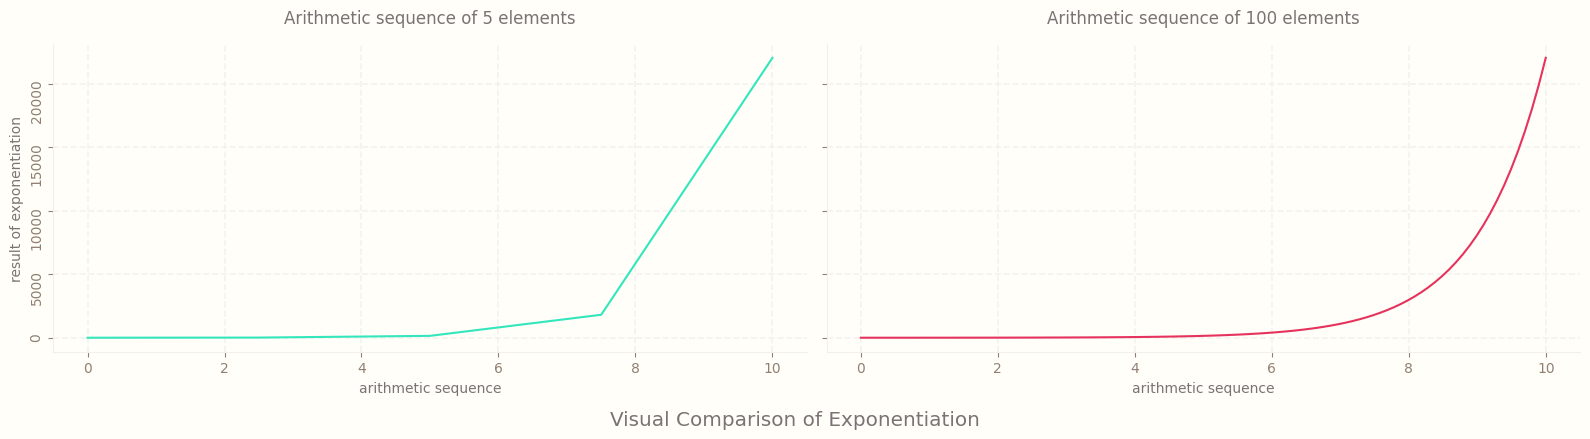

In [26]:
colors = calm_color_generator(2)
plt.rcParams['figure.figsize'] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

x_1 = torch.linspace(0, 10, 5)
y_1 = torch.exp(x_1)
axs[0].plot(x_1.numpy(), y_1.numpy(), c=colors.pop(0))
axs[0].set_title("Arithmetic sequence of 5 elements", loc='center', pad=15)

x_2 = torch.linspace(0, 10, 100)
y_2 = torch.exp(x_2)
axs[1].plot(x_2.numpy(), y_2.numpy(), c=colors.pop(0))
axs[1].set_title("Arithmetic sequence of 100 elements", loc='center', pad=15)

for ax in axs.flat:
    ax.set(xlabel="arithmetic sequence", ylabel="result of exponentiation")
    ax.tick_params(axis='y', labelrotation=90)
    ax.label_outer()

fig.suptitle("Visual Comparison of Exponentiation",
             fontsize='x-large',
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

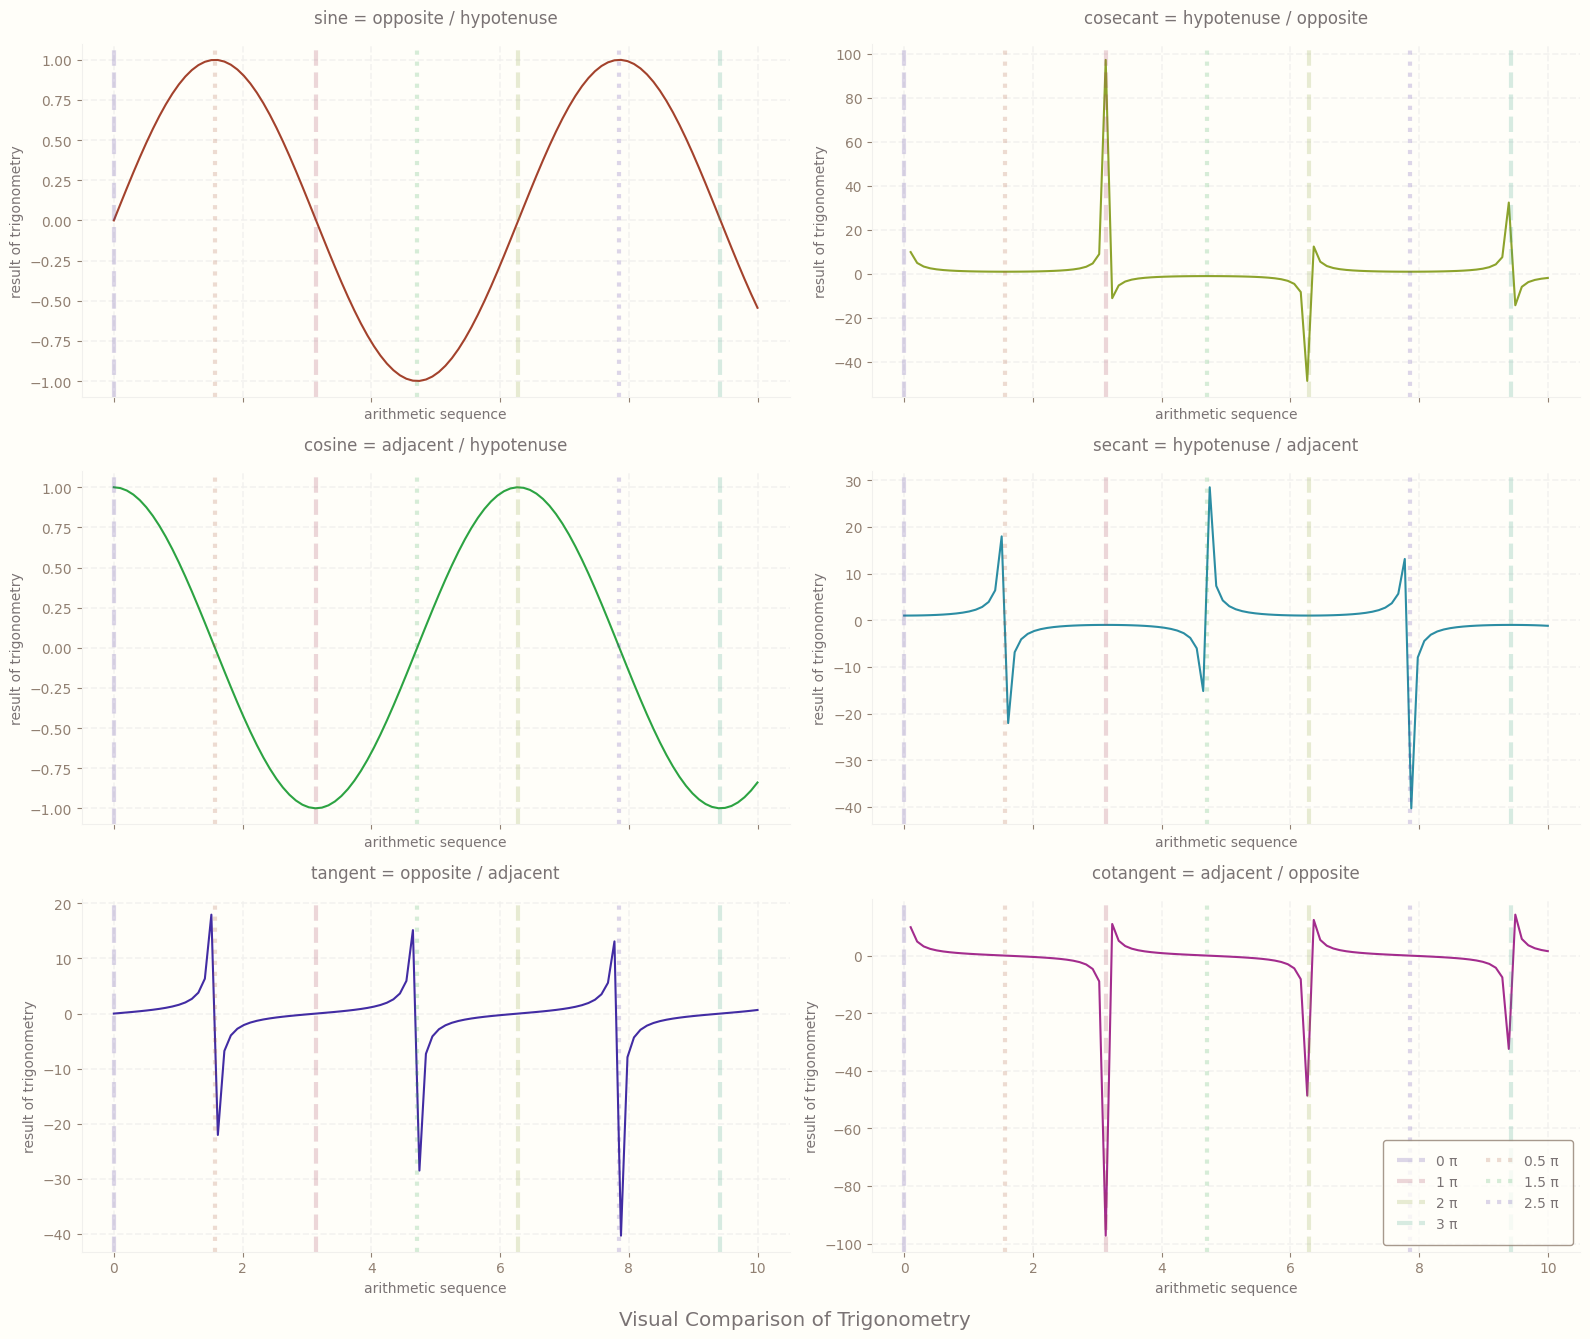

In [27]:
def csc(x):
    return 1 / torch.sin(x)


def sec(x):
    return 1 / torch.cos(x)


def cot(x):
    return 1 / torch.tan(x)


colors = calm_color_generator(6)
plt.rcParams['figure.figsize'] = (figure_size[0], figure_size[1] / 2 * 3)

value_list_1 = [0, torch.pi, 2 * torch.pi, 3 * torch.pi]
value_list_2 = [i - .5 * torch.pi for i in value_list_1][1:]
color_list_1 = calm_color_generator(4)
color_list_2 = calm_color_generator(3)
label_list_1 = ['0 π', '1 π', '2 π', '3 π']
label_list_2 = ['0.5 π', '1.5 π', '2.5 π']

fig, axs = plt.subplots(3, 2, sharex=True)

x = torch.linspace(0, 10, 100)
y_1 = torch.sin(x)
axs[0, 0].plot(x.numpy(), y_1.numpy(), c=colors.pop(0))
axs[0, 0].set_title("sine = opposite / hypotenuse", loc='center', pad=15)

y_2 = csc(x)
axs[0, 1].plot(x.numpy(), y_2.numpy(), c=colors.pop(0))
axs[0, 1].set_title("cosecant = hypotenuse / opposite", loc='center', pad=15)

y_3 = torch.cos(x)
axs[1, 0].plot(x.numpy(), y_3.numpy(), c=colors.pop(0))
axs[1, 0].set_title("cosine = adjacent / hypotenuse", loc='center', pad=15)

y_4 = sec(x)
axs[1, 1].plot(x.numpy(), y_4.numpy(), c=colors.pop(0))
axs[1, 1].set_title("secant = hypotenuse / adjacent", loc='center', pad=15)

y_5 = torch.tan(x)
axs[2, 0].plot(x.numpy(), y_5.numpy(), c=colors.pop(0))
axs[2, 0].set_title("tangent = opposite / adjacent", loc='center', pad=15)

y_6 = cot(x)
axs[2, 1].plot(x.numpy(), y_6.numpy(), c=colors.pop(0))
axs[2, 1].set_title("cotangent = adjacent / opposite", loc='center', pad=15)

for ax in axs.flat:
    ax.set(xlabel="arithmetic sequence", ylabel='result of trigonometry')
    for x, c, label in zip(value_list_1, color_list_1, label_list_1):
        ax.axvline(x=x,
                   c=c,
                   label=label,
                   alpha=.2,
                   linestyle='--',
                   linewidth=3)
    for x, c, label in zip(value_list_2, color_list_2, label_list_2):
        ax.axvline(x=x, c=c, label=label, alpha=.2, linestyle=':', linewidth=3)

fig.suptitle('Visual Comparison of Trigonometry',
             fontsize='x-large',
             x=0.5,
             y=0)

plt.legend(loc='lower right', borderpad=1, ncol=2)
plt.tight_layout()
plt.show()

## 2 Dimensional Tensors

In [28]:
one_d = torch.arange(2, 7)

font_color_printer("Creation of 1D tensor from defined interval")

statement_1 = ["one_d = torch.arange(2, 7)"]
statements = statement_1
statement_generator(statements)

variables = ["one_d"]
values = [str(one_d)]
variable_generator(variables, values)

Creation of 1D tensor from defined interval

    +----------------------------+
    | Statement                  |
    +----------------------------+
    | one_d = torch.arange(2, 7) |
    +----------------------------+
    +----------+-------------------------+
    | Variable | Value                   |
    +----------+-------------------------+
    | one_d    | tensor([2, 3, 4, 5, 6]) |
    +----------+-------------------------+


In [29]:
one_d = torch.arange(2, 7, 2)

font_color_printer(
    "Creation of 1D tensor from defined interval and difference")

statement_1 = ["one_d = torch.arange(2, 7, 2)"]
statements = statement_1
statement_generator(statements)

variables = ["one_d"]
values = [str(one_d)]
variable_generator(variables, values)

Creation of 1D tensor from defined interval and difference

    +-------------------------------+
    | Statement                     |
    +-------------------------------+
    | one_d = torch.arange(2, 7, 2) |
    +-------------------------------+
    +----------+-------------------+
    | Variable | Value             |
    +----------+-------------------+
    | one_d    | tensor([2, 4, 6]) |
    +----------+-------------------+


In [30]:
one_d = torch.arange(0, 9)
two_d = one_d.view(3, 3)

font_color_printer("Creation of 2D tensor from 1D tensor")

statement_1 = ["one_d = torch.arange(0, 9)"]
statement_2 = ["two_d = one_d.view(3, 3)"]
statements = statement_1 + statement_2
statement_generator(statements)

variables = ["one_d", "two_d"]
values = [str(one_d), str(two_d)]
variable_generator(variables, values)

expressions = ["one_d.dim()", "two_d.dim()"]
results = [str(one_d.dim()), str(two_d.dim())]
expression_generator(expressions, results)

Creation of 2D tensor from 1D tensor

    +----------------------------+
    | Statement                  |
    +----------------------------+
    | one_d = torch.arange(0, 9) |
    | two_d = one_d.view(3, 3)   |
    +----------------------------+
    +----------+-------------------------------------+
    | Variable | Value                               |
    +----------+-------------------------------------+
    | one_d    | tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]) |
    | two_d    | tensor([[0, 1, 2],                  |
    |          |         [3, 4, 5],                  |
    |          |         [6, 7, 8]])                 |
    +----------+-------------------------------------+
    +-------------+--------+
    | Expression  | Result |
    +-------------+--------+
    | one_d.dim() | 1      |
    | two_d.dim() | 2      |
    +-------------+--------+


In [31]:
font_color_printer("Element selection of 2D tensor")

expressions = ["two_d[0, 0]", "two_d[1, 2]", "two_d[-2, -1]"]
results = [str(two_d[0, 0]), str(two_d[1, 2]), str(two_d[-2, -1])]
expression_generator(expressions, results)

Element selection of 2D tensor

    +---------------+-----------+
    | Expression    | Result    |
    +---------------+-----------+
    | two_d[0, 0]   | tensor(0) |
    | two_d[1, 2]   | tensor(5) |
    | two_d[-2, -1] | tensor(5) |
    +---------------+-----------+


In [32]:
font_color_printer("Segment slicing of 2D tensor")

expressions = ["two_d[0]", "two_d[:-1, ]", "two_d[:, 0]", "two_d[:, :-1]"]
results = [
    str(two_d[0]),
    str(two_d[:-1, ]),
    str(two_d[:, 0]),
    str(two_d[:, :-1])
]
expression_generator(expressions, results)

Segment slicing of 2D tensor

    +---------------+---------------------+
    | Expression    | Result              |
    +---------------+---------------------+
    | two_d[0]      | tensor([0, 1, 2])   |
    | two_d[:-1, ]  | tensor([[0, 1, 2],  |
    |               |         [3, 4, 5]]) |
    | two_d[:, 0]   | tensor([0, 3, 6])   |
    | two_d[:, :-1] | tensor([[0, 1],     |
    |               |         [3, 4],     |
    |               |         [6, 7]])    |
    +---------------+---------------------+


In [33]:
three_d_1 = torch.arange(18).view(2, 3, 3)
three_d_2 = torch.arange(18).view(3, 2, 3)
three_d_3 = torch.arange(18).view(3, 3, 2)

font_color_printer("Creation of 3D tensor from 1D tensor")

statement_1 = ["three_d_1 = torch.arange(18).view(2, 3, 3)"]
statement_2 = ["three_d_2 = torch.arange(18).view(3, 2, 3)"]
statement_3 = ["three_d_3 = torch.arange(18).view(3, 3, 2)"]
statements = statement_1 + statement_2 + statement_3
statement_generator(statements)

variables = ["three_d_1", "three_d_2", "three_d_3"]
values = [str(three_d_1), str(three_d_2), str(three_d_3)]
variable_generator(variables, values)

expressions = ["three_d_1.dim()", "three_d_2.dim()", "three_d_3.dim()"]
results = [str(three_d_1.dim()), str(three_d_2.dim()), str(three_d_3.dim())]
expression_generator(expressions, results)

Creation of 3D tensor from 1D tensor

    +--------------------------------------------+
    | Statement                                  |
    +--------------------------------------------+
    | three_d_1 = torch.arange(18).view(2, 3, 3) |
    | three_d_2 = torch.arange(18).view(3, 2, 3) |
    | three_d_3 = torch.arange(18).view(3, 3, 2) |
    +--------------------------------------------+
    +-----------+--------------------------+
    | Variable  | Value                    |
    +-----------+--------------------------+
    | three_d_1 | tensor([[[ 0,  1,  2],   |
    |           |          [ 3,  4,  5],   |
    |           |          [ 6,  7,  8]],  |
    |           |                          |
    |           |         [[ 9, 10, 11],   |
    |           |          [12, 13, 14],   |
    |           |          [15, 16, 17]]]) |
    | three_d_2 | tensor([[[ 0,  1,  2],   |
    |           |          [ 3,  4,  5]],  |
    |           |                          |
    |           |   

## Slicing 3D Tensors

In [34]:
font_color_printer("Element selection of 3D tensor")

expressions = [
    "three_d_1[1, 1, 1]", "three_d_2[1, 1, 1]", "three_d_3[1, 1, 1]"
]
results = [
    str(three_d_1[1, 1, 1]),
    str(three_d_2[1, 1, 1]),
    str(three_d_3[1, 1, 1])
]
expression_generator(expressions, results)

Element selection of 3D tensor

    +--------------------+------------+
    | Expression         | Result     |
    +--------------------+------------+
    | three_d_1[1, 1, 1] | tensor(13) |
    | three_d_2[1, 1, 1] | tensor(10) |
    | three_d_3[1, 1, 1] | tensor(9)  |
    +--------------------+------------+


In [35]:
font_color_printer("Segment slicing of 3D tensor")

expressions = [
    "three_d_2[1, 0:2, 0:3]", "three_d_2[1, :, :]", "three_d_2[:, :2, :-1]"
]
results = [
    str(three_d_2[1, 0:2, 0:3]),
    str(three_d_2[1, :, :]),
    str(three_d_2[:, :2, :-1])
]
expression_generator(expressions, results)

Segment slicing of 3D tensor

    +------------------------+------------------------+
    | Expression             | Result                 |
    +------------------------+------------------------+
    | three_d_2[1, 0:2, 0:3] | tensor([[ 6,  7,  8],  |
    |                        |         [ 9, 10, 11]]) |
    | three_d_2[1, :, :]     | tensor([[ 6,  7,  8],  |
    |                        |         [ 9, 10, 11]]) |
    | three_d_2[:, :2, :-1]  | tensor([[[ 0,  1],     |
    |                        |          [ 3,  4]],    |
    |                        |                        |
    |                        |         [[ 6,  7],     |
    |                        |          [ 9, 10]],    |
    |                        |                        |
    |                        |         [[12, 13],     |
    |                        |          [15, 16]]])   |
    +------------------------+------------------------+


## Matrix Multiplication

In [36]:
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)

font_color_printer("Matrix multiplication of tensors")

statement_1 = ["mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)"]
statement_2 = ["mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)"]
statements = statement_1 + statement_2
statement_generator(statements)

variables = ["mat_a", "mat_b"]
values = [str(mat_a), str(mat_b)]
variable_generator(variables, values)

expressions = ["torch.matmul(mat_a, mat_b)", "mat_a @ mat_b"]
results = [str(torch.matmul(mat_a, mat_b)), str(mat_a @ mat_b)]
expression_generator(expressions, results)

Matrix multiplication of tensors

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)   |
    | mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2) |
    +-------------------------------------------------------+
    +----------+---------------------+
    | Variable | Value               |
    +----------+---------------------+
    | mat_a    | tensor([[0, 3, 5],  |
    |          |         [5, 5, 2]]) |
    | mat_b    | tensor([[ 3,  4],   |
    |          |         [ 3, -2],   |
    |          |         [ 4, -2]])  |
    +----------+---------------------+
    +----------------------------+----------------------+
    | Expression                 | Result               |
    +----------------------------+----------------------+
    | torch.matmul(mat_a, mat_b) | tensor([[ 29, -16],  |
    |      

## Gradient with PyTorch

In [37]:
x = torch.tensor(2.0, requires_grad=True)
y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1
y.backward()

font_color_printer("Method of making predictions")

statement_1 = ["x = torch.tensor(2.0, requires_grad=True)"]
statement_2 = ["y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1"]
statement_3 = ["y.backward()"]
statements = statement_1 + statement_2 + statement_3
statement_generator(statements)

variables = ["x", "y"]
values = [str(x), str(y)]
variable_generator(variables, values)

expressions = ["x.grad"]
results = [str(x.grad)]
expression_generator(expressions, results)

Method of making predictions

    +------------------------------------------------+
    | Statement                                      |
    +------------------------------------------------+
    | x = torch.tensor(2.0, requires_grad=True)      |
    | y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1 |
    | y.backward()                                   |
    +------------------------------------------------+
    +----------+--------------------------------------+
    | Variable | Value                                |
    +----------+--------------------------------------+
    | x        | tensor(2., requires_grad=True)       |
    | y        | tensor(185., grad_fn=<AddBackward0>) |
    +----------+--------------------------------------+
    +------------+--------------+
    | Expression | Result       |
    +------------+--------------+
    | x.grad     | tensor(330.) |
    +------------+--------------+


In [38]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()

font_color_printer("Calculation of partial derivative")

statement_1 = ["x = torch.tensor(1.0, requires_grad=True)"]
statement_2 = ["z = torch.tensor(2.0, requires_grad=True)"]
statement_3 = ["y = x**2 + z**3"]
statement_4 = ["y.backward()"]
statements = statement_1 + statement_2 + statement_3 + statement_4
statement_generator(statements)

variables = ["x", "z", "y"]
values = [str(x), str(z), str(y)]
variable_generator(variables, values)

expressions = ["x.grad", "z.grad"]
results = [str(x.grad), str(z.grad)]
expression_generator(expressions, results)

Calculation of partial derivative

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | x = torch.tensor(1.0, requires_grad=True) |
    | z = torch.tensor(2.0, requires_grad=True) |
    | y = x**2 + z**3                           |
    | y.backward()                              |
    +-------------------------------------------+
    +----------+------------------------------------+
    | Variable | Value                              |
    +----------+------------------------------------+
    | x        | tensor(1., requires_grad=True)     |
    | z        | tensor(2., requires_grad=True)     |
    | y        | tensor(9., grad_fn=<AddBackward0>) |
    +----------+------------------------------------+
    +------------+-------------+
    | Expression | Result      |
    +------------+-------------+
    | x.grad     | tensor(2.)  |
    | z.grad     | tensor(12.) |
    +------------+----